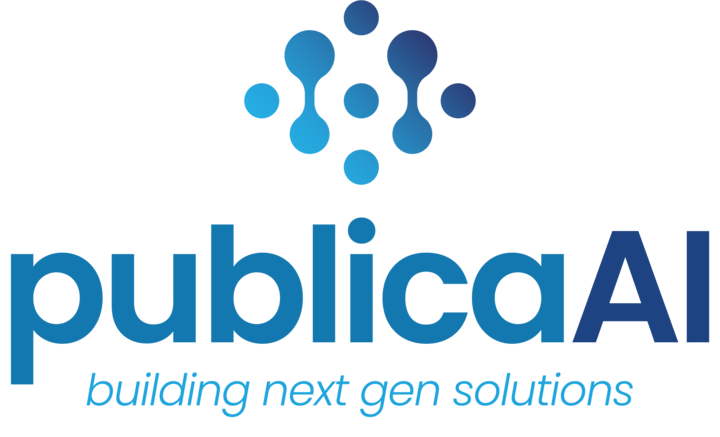

## Understanding Embeddings

Embeddings are a way to represent words, sentences, or even images as numerical vectors (arrays of numbers) so that computers can process them.

Computers don’t understand human language like we do. For example, when we see these words:

➡️ "cat" and "dog", we know they are both animals.

➡️ "king" and "queen", we know they are related (royalty).

But for a computer, these words are just text.
To help computers understand relationships between words, we use embeddings.

In Embedding a text/word,

- Every word (or sentence) is converted into a vector of numbers.
- Similar words will have similar vectors (close together in space).
- Unrelated words will have different vectors (far apart in space).

For example, a simple embedding might look like this:

| Word   | Embedding (Vector)            |
|--------|--------------------------------|
| King   | [0.82, 0.45, 0.12, 0.99]       |
| Queen  | [0.81, 0.46, 0.13, 0.98]       |
| Apple  | [0.12, 0.89, 0.92, 0.33]       |
| Banana | [0.11, 0.88, 0.91, 0.34]       |


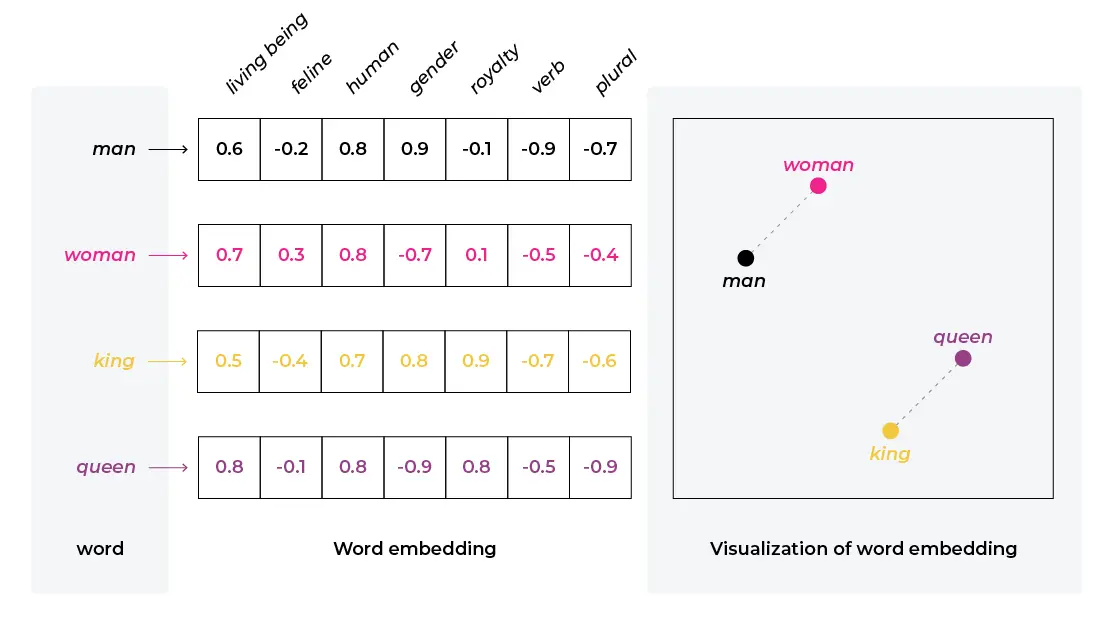

Here, "King" and "Queen" are similar (almost the same numbers), but "Apple" and "Banana" are different from them.

## Creating a Simple Word Embedding

Before we use AI models, let’s create embeddings manually.

In [ ]:
import numpy as np

In [ ]:


# Define simple word embeddings (vectors)
word_embeddings = {
    "king": np.array([0.82, 0.45, 0.12, 0.99]),
    "queen": np.array([0.81, 0.46, 0.13, 0.98]),
    "apple": np.array([0.12, 0.89, 0.92, 0.33]),
    "banana": np.array([0.11, 0.88, 0.91, 0.34])
}

In [ ]:
# Function to calculate similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))



In [ ]:
# Compare "king" and "queen"
similarity = cosine_similarity(word_embeddings["king"], word_embeddings["queen"])
print(f"Similarity between 'king' and 'queen': {similarity:.4f}")



Similarity between 'king' and 'queen': 0.9999


In [ ]:
# Compare "king" and "apple"
similarity = cosine_similarity(word_embeddings["king"], word_embeddings["apple"])
print(f"Similarity between 'king' and 'apple': {similarity:.4f}")

Similarity between 'king' and 'apple': 0.5158


Here, we  define some words and assign each one a vector (4 numbers per word).

We use cosine similarity to measure how similar two words are.

- If the similarity score is close to 1, the words are similar.
- If the score is close to 0, the words are unrelated.

Now, let’s create embeddings using PyTorch.

PyTorch provides an `nn.Embedding` module to handle embeddings efficiently.

In PyTorch, we can create embeddings as follows:

- Define the vocabulary size (i.e., the number of unique words).
- Set the embedding dimension (how many numbers represent each word).
- Create an embedding layer using torch.nn.Embedding.
- Index the embedding layer to get the vector representation of words.


In [ ]:
import torch
import torch.nn as nn

In [ ]:

# Define vocabulary size and embedding dimensions
vocab_size = 10  # Assume we have 10 words in our vocabulary
embedding_dim = 4  # Each word is represented by a 4D vector

In [ ]:
# Create an embedding layer
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

In [ ]:
vocabulary = {'king':1, 'queen':2}

In [ ]:
word_indices = torch.tensor(list(vocabulary.values()))  # Example: "king" → 1, "queen" → 2

In [ ]:
word_vectors = embedding_layer(word_indices)



In [ ]:
print("Embedding for 'king':", word_vectors[0])
print("Embedding for 'queen':", word_vectors[1])

Embedding for 'king': tensor([-2.0476, -0.3378, -0.2773, -1.1717], grad_fn=<SelectBackward0>)
Embedding for 'queen': tensor([-1.0096,  1.0853,  1.6707,  0.5729], grad_fn=<SelectBackward0>)


## Using Word2Vec

Instead of manually assigning numbers, we can train a model to learn word embeddings.

How Word2Vec Works:

- Takes a large text dataset (e.g., Wikipedia).
- Trains a model to understand word relationships.
- Outputs vector representations for each word.

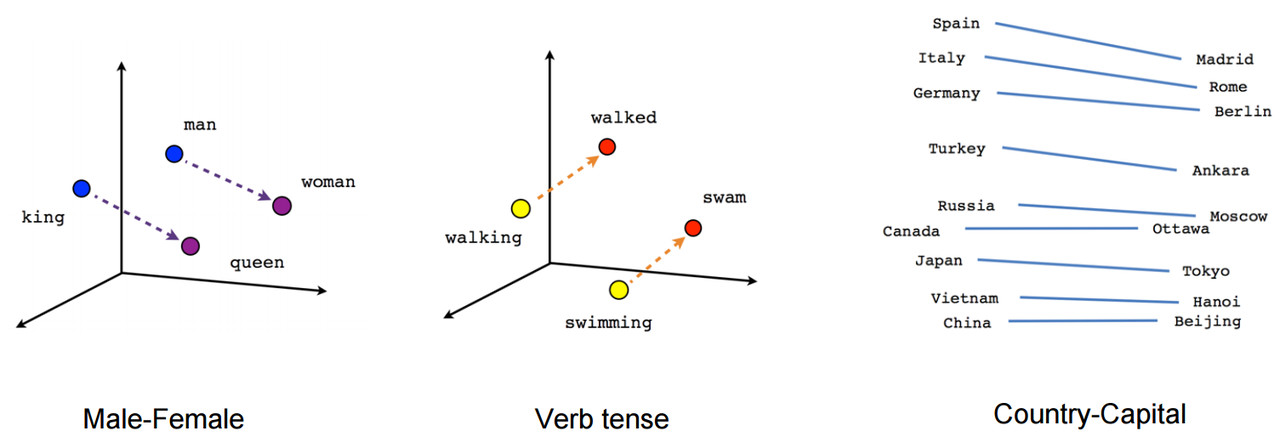

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [ ]:
sentences = [
    "The king rules the kingdom",
    "The queen is the ruler of the kingdom",
    "An apple a day keeps the doctor away",
    "Bananas are rich in potassium"
]

In [ ]:
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

In [ ]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=10, window=5, min_count=1, sg=0)

In [ ]:
# Get vector for "king"
print("Embedding for 'king':", model.wv["king"])


Embedding for 'king': [-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
  0.08077437 -0.05930896  0.00045162 -0.04753734]


In [ ]:

# Find similar words
print("Words similar to 'king':", model.wv.most_similar("king"))

Words similar to 'king': [('apple', 0.7670928239822388), ('ruler', 0.2941223680973053), ('are', 0.28965628147125244), ('of', 0.20713211596012115), ('in', 0.1990070641040802), ('the', 0.10494355112314224), ('rich', 0.09501107782125473), ('queen', 0.0926920548081398), ('keeps', 0.0575542226433754), ('an', -0.10544763505458832)]


We basically


- tokenize sentences into words.
- Train a Word2Vec model to learn word embeddings.
- Retrieve the vector representation of "king".
- Find the most similar words to "king" in our dataset.

## Contextual Embeddings with BERT

BERT (Bidirectional Encoder Representations from Transformers) is a powerful language model that generates contextual embeddings for words and sentences. Unlike traditional embeddings like Word2Vec, which produce static embeddings, BERT dynamically adjusts word meanings based on context.



Word2Vec has a problem: it doesn’t understand context.
Example:

- "I deposited money in the bank."
- "The river flowed past the bank."
For humans, "bank" has two meanings, but Word2Vec treats them as the same.

BERT solves this problem by generating different embeddings depending on context.

#### How BERT Generates Embeddings:

- Tokenization: BERT breaks a sentence into subwords (e.g., "machine learning" → ["machine", "learning"]).
- Position Encoding: BERT keeps track of word positions in the sentence.
- Attention Mechanism: It uses self-attention to understand word relationships.
- Hidden States: Each layer in BERT refines the word representation.
BERT produces word-level embeddings and sentence-level embeddings, depending on how we extract them.


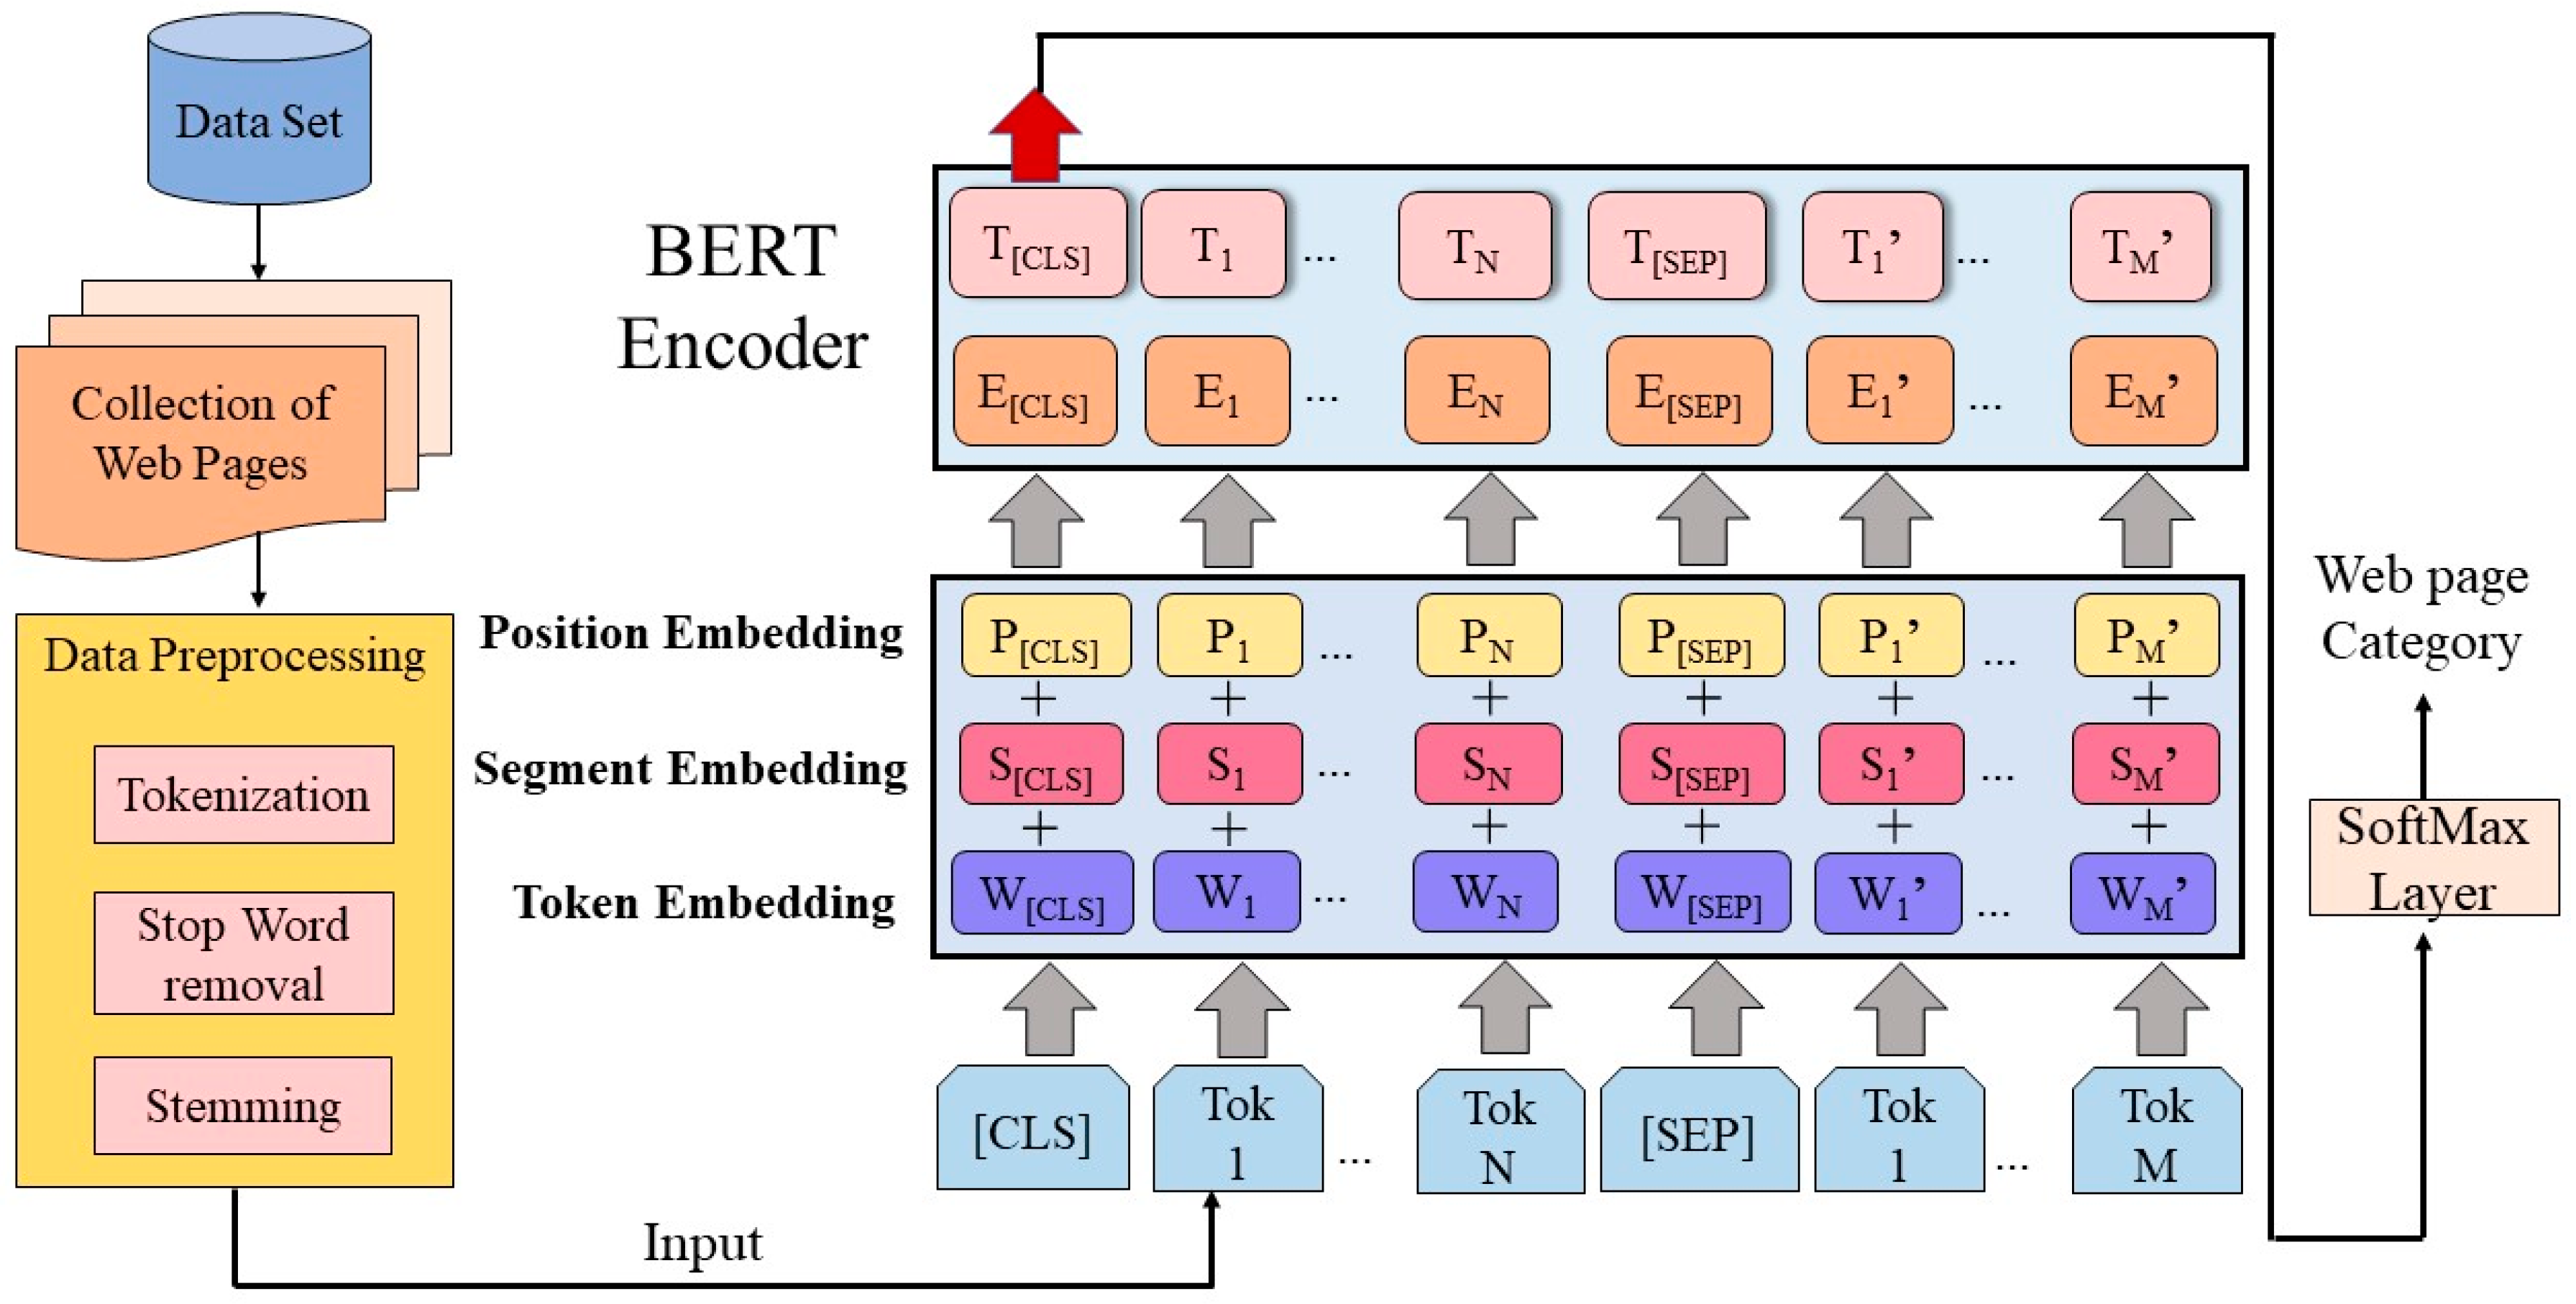

#### Extracting Word Embeddings from BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch


In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [ ]:
# Tokenize input sentence
sentence = "I love deep learning"
tokens = tokenizer(sentence, return_tensors="pt")

In [ ]:
# Generate embeddings
with torch.no_grad():
    outputs = model(**tokens)

In [ ]:
# Extract last hidden state (word embeddings)
word_embeddings = outputs.last_hidden_state
word_embeddings

tensor([[[ 9.3486e-02,  3.0050e-02, -4.6828e-02,  ..., -1.0040e-01,
           1.0230e-03,  2.1679e-01],
         [ 7.6330e-01, -3.5065e-02,  4.6345e-02,  ..., -5.5347e-01,
           5.2810e-01,  1.8710e-01],
         [ 1.1967e+00,  7.6666e-01,  6.4563e-01,  ..., -2.1349e-01,
           2.3838e-01,  1.3432e-02],
         [-4.0433e-01, -1.5201e-01,  3.2283e-01,  ..., -4.0212e-02,
          -3.7929e-01, -1.5299e-01],
         [-5.6861e-01, -4.1607e-01, -4.1898e-01,  ...,  7.1889e-01,
           4.5186e-02, -4.6932e-01],
         [ 7.9565e-01,  1.5865e-01, -1.3434e-01,  ...,  5.1305e-02,
          -7.3476e-01, -4.3212e-01]]])

In [ ]:
# Print shape (batch_size, sequence_length, embedding_dim)
print(word_embeddings.shape)

torch.Size([1, 6, 768])


#### Extracting Sentence Embeddings with BERT

Since BERT produces word embeddings, we need a way to get sentence embeddings.

- Take the [CLS] token embedding (default BERT approach).
- Average all word embeddings in a sentence.
- Use Sentence Transformers, which fine-tune BERT for sentence-level tasks.

For sentence-level embeddings, we use sentence-transformers, which is optimized for tasks like search, similarity, and classification.

In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained model
model = SentenceTransformer("all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

# Define sentences
sentences = ["I love machine learning", "AI is amazing", "The weather is nice today"]




In [ ]:
# Generate embeddings
embeddings = model.encode(sentences)



In [ ]:
# Print embeddings
for sentence, embedding in zip(sentences, embeddings):
    print(f"Sentence: {sentence}\nEmbedding: {embedding[:5]}... (truncated)\n")

Sentence: I love machine learning
Embedding: [-0.04363634 -0.05905434  0.08201233 -0.01076716  0.06119594]... (truncated)

Sentence: AI is amazing
Embedding: [-0.05198843 -0.06730012  0.03398301 -0.04232055  0.01524857]... (truncated)

Sentence: The weather is nice today
Embedding: [-0.03628499  0.09088083  0.14121284  0.06306534  0.0062286 ]... (truncated)



#### Using Bert Embeddings for Search

One powerful use case for embeddings is semantic search—finding relevant documents based on meaning, not keywords.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Sample dataset
documents = [
    "AI is the future of technology",
    "Machine learning is a subset of AI",
    "Neural networks power deep learning",
    "I love cooking Italian food"
]

In [ ]:
# Encode document embeddings
doc_embeddings = model.encode(documents)

In [ ]:
# Encode search query
query = "Tell me about AI"
query_embedding = model.encode([query])

In [ ]:
# Compute similarities
similarities = cosine_similarity(query_embedding, doc_embeddings)

In [ ]:
# Find most relevant document
best_match_idx = similarities.argmax()
print(f"Best match: {documents[best_match_idx]}")

Best match: AI is the future of technology


## OpenAI Embeddings

OpenAI provides powerful embedding models that convert text into high-dimensional vectors. These embeddings capture semantic meaning and are useful for tasks like search, clustering, and classification.

[see their documentation for available embeddings](https://platform.openai.com/docs/guides/embeddings/embedding-models#embedding-models)

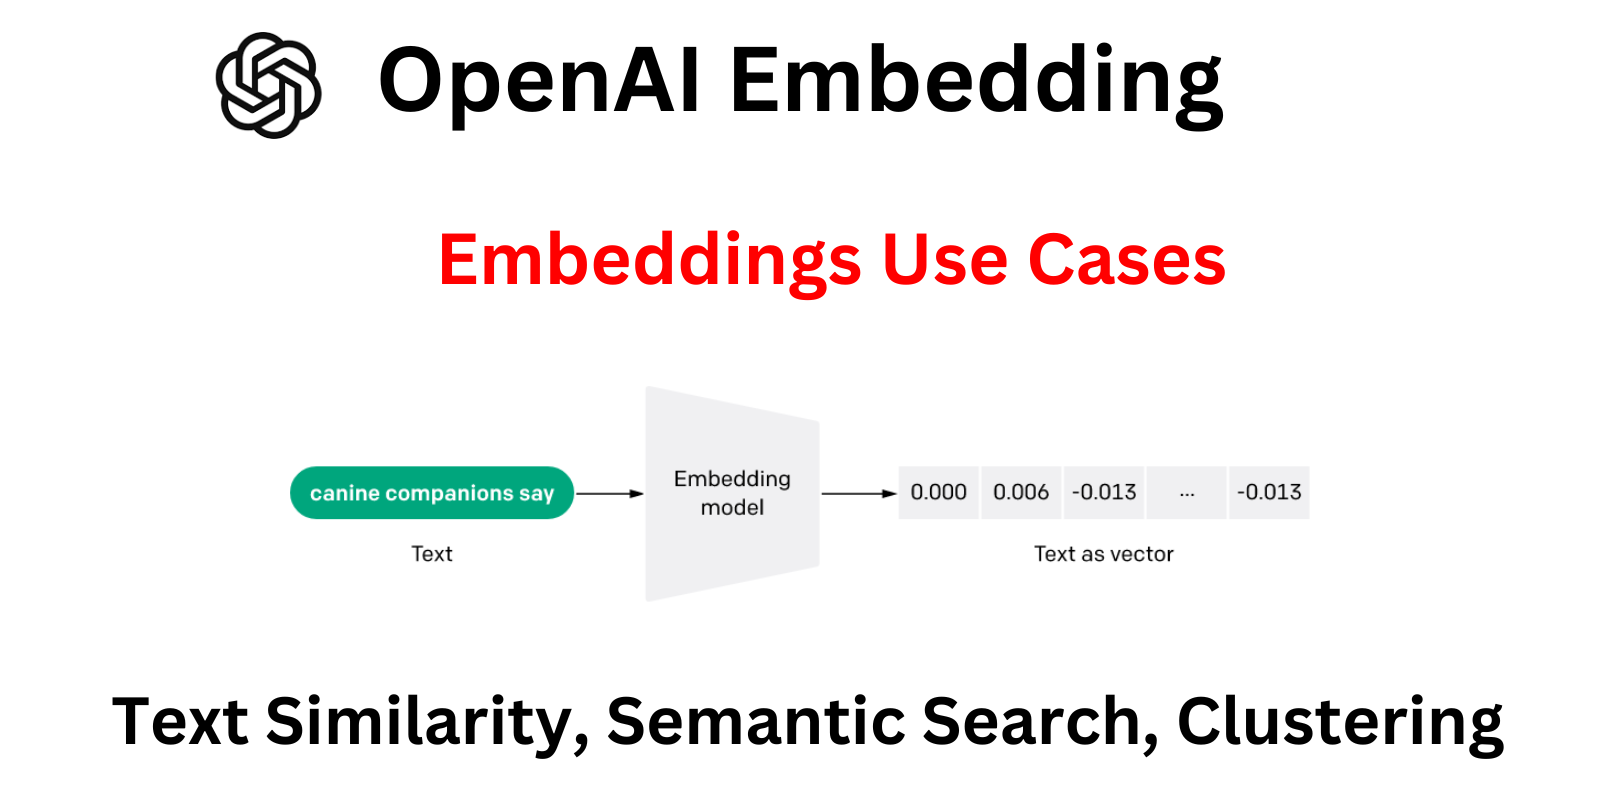

To use OpenAI’s embedding models, install the OpenAI Python package:

In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.61.1
    Uninstalling openai-1.61.1:
      Successfully uninstalled openai-1.61.1


In [ ]:
import openai

In [ ]:
# Define your OpenAI API key
openai.api_key = ""

In [ ]:

# Define text inputs
texts = ["Machine learning is fascinating", "Deep learning powers AI", "The sky is blue"]


In [ ]:
# Generate embeddings
response = openai.Embedding.create(
    model="text-embedding-ada-002",
    input=texts
)

In [ ]:
embeddings = [item["embedding"] for item in response["data"]]

In [ ]:
# # Extract embeddings
# embeddings = response.data[0].embedding
# embeddings

In [ ]:
# Print first few values of each embedding
for text, embedding in zip(texts, embeddings):
    print(f"Text: {text}\nEmbedding: {embedding[:5]}... (truncated)\n")

Text: Machine learning is fascinating
Embedding: [-0.026383141055703163, 0.012421307153999805, 0.01179344579577446, -0.017800206318497658, -0.004365905188024044]... (truncated)

Text: Deep learning powers AI
Embedding: [-0.014206928201019764, -0.014043159782886505, 0.010133183561265469, -0.009348458610475063, -0.011955109424889088]... (truncated)

Text: The sky is blue
Embedding: [0.009311883710324764, -0.0006936922436580062, 0.00608569523319602, -0.01534519623965025, -0.013496377505362034]... (truncated)



#### Using OpenAI Embeddings for Search

We can use OpenAI embeddings for semantic search by computing similarity between queries and documents.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Define documents
documents = [
    "AI is transforming the world",
    "Neural networks are powerful",
    "I enjoy watching movies"
]



In [ ]:
# Generate embeddings for documents
doc_embeddings = openai.Embedding.create(
    model="text-embedding-ada-002",
    input=documents
)



In [ ]:
doc_embeddings

<OpenAIObject list at 0x7c78d77396d0> JSON: {
  "object": "list",
  "data": [
    {
      "object": "embedding",
      "index": 0,
      "embedding": [
        -0.008762180805206299,
        -0.019431157037615776,
        0.003625506302341819,
        -0.0027385868597775698,
        0.0017284391215071082,
        0.006213300861418247,
        -0.03030119091272354,
        0.012089344672858715,
        0.0046048471704125404,
        -0.03964059799909592,
        0.018523160368204117,
        0.024373261258006096,
        0.009709092788398266,
        -0.012011516839265823,
        0.006511643063277006,
        0.0021435238886624575,
        0.021921666339039803,
        6.308356387307867e-05,
        0.0061873579397797585,
        -0.006025215610861778,
        -0.02832953818142414,
        0.023037206381559372,
        0.01838047429919243,
        -0.019158758223056793,
        -0.01694064773619175,
        -0.0032104216516017914,
        0.015513794496655464,
        -0.04218299314379

In [ ]:
doc_vectors = [item['embedding'] for item in doc_embeddings["data"]]

In [ ]:
query = "Tell me about AI"

response = openai.Embedding.create(
    model="text-embedding-ada-002",
    input=query
)

query_embedding = response["data"][0]["embedding"]

In [ ]:
query_embedding

[0.0013675779337063432,
 -0.018827740103006363,
 -0.00860715750604868,
 -0.004350247792899609,
 -0.007093737367540598,
 0.030961764976382256,
 -0.01578756608068943,
 0.0319751538336277,
 -0.01988113299012184,
 -0.017747677862644196,
 0.024094706401228905,
 0.014614165760576725,
 0.0034801983274519444,
 -0.0127407256513834,
 0.00011844425171148032,
 0.0025418114382773638,
 0.039308905601501465,
 0.014414154924452305,
 0.01853439025580883,
 0.0024918087292462587,
 -0.019201094284653664,
 0.017374323680996895,
 -0.0012659054482355714,
 -0.009320531040430069,
 -0.006480369251221418,
 0.0032535186037421227,
 0.016080915927886963,
 -0.03117511048913002,
 -0.00640036491677165,
 -0.020801184698939323,
 0.03437529131770134,
 -0.00899384543299675,
 -0.01821437105536461,
 0.006263690069317818,
 -0.007353752385824919,
 0.003940224647521973,
 0.007573764771223068,
 0.0008496317313984036,
 0.01482751127332449,
 -0.00041835717274807394,
 0.03130844980478287,
 0.0033235226292163134,
 0.001848438638262

In [ ]:
# Compute similarity
similarities = cosine_similarity([query_embedding], doc_vectors)

# Find best match
best_match_idx = similarities.argmax()
print(f"Best match: {documents[best_match_idx]}")

Best match: AI is transforming the world


#### *Congratulations on completing this course, the end..........*